In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

In [2]:
#normalize X values to help model converge
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data = (data - mean) / std
    return data

In [3]:
#retrieve and format data - into labels and examples from the dataset
def features_and_labels(filename, col_name):
    data = pd.read_csv(filename)

    data_y = data[col_name]
    data_y-= 1

    #pandas 1 = col, 0 = row
    data_x = data.drop(col_name, axis=1)
    data_x = normalize(data_x)
    return data_x, data_y

In [4]:
training_data_x, training_data_y = features_and_labels("../archive/exoTrain.csv",'LABEL')
testing_data_x, testing_data_y = features_and_labels("../archive/exoTest.csv",'LABEL')

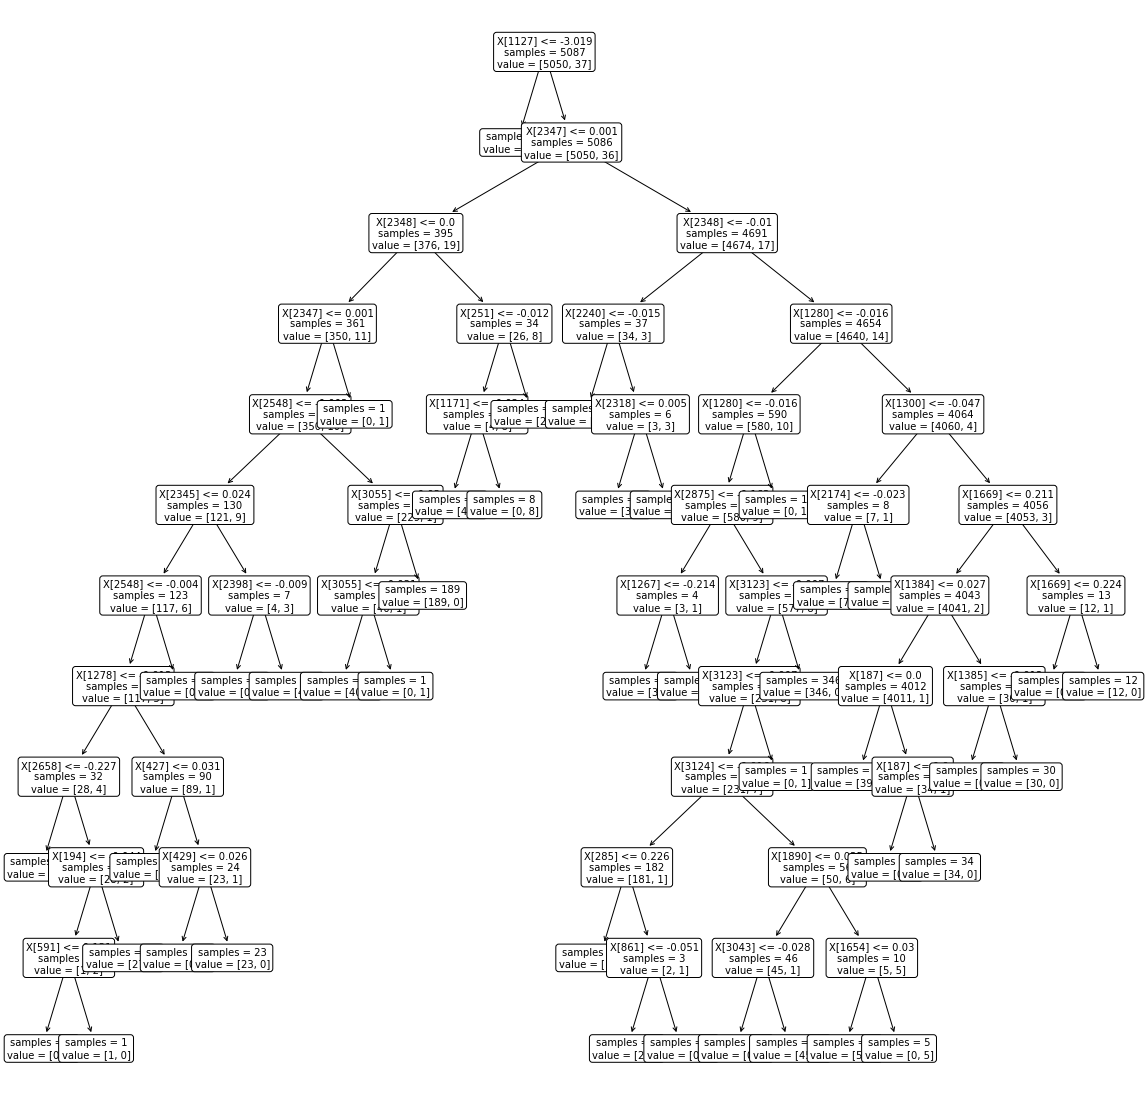

Accuracy percentage:  92.45614035087719 %


In [5]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x.values, training_data_y.values)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(testing_data_x.values)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

In [6]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [7]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x.values, training_data_y.values)
y_pred = RFclassifier.predict(testing_data_x.values)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

Accuracy percentage:  99.12280701754386 %


In [8]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)